<a href="https://colab.research.google.com/github/mariajosemv/Predicciones-con-Redes-Neuronales/blob/main/intro_deep_learning/dise%C3%B1o_entrenamiento_y_evaluacion_del_modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inicialización

In [1]:
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd '/content/drive/My Drive/Colab Notebooks/Platzi/curso-redes-neuronales/github/intro_deep_learning'
%ls

/content/drive/My Drive/Colab Notebooks/Platzi/curso-redes-neuronales/github/intro_deep_learning
'Copia de design-training-and-evaluation.ipynb'   ingenieria_de_datos.ipynb
 datasets/


In [3]:
cars = pd.read_parquet('./datasets/cars.parquet')

# División datos de entrenamiento, validación y prueba. 

In [4]:
target = cars['price']
cars.drop('price', axis=1, inplace=True)

In [5]:
from sklearn.model_selection import train_test_split
# Train/test 80:20
x_train, x_test, y_train, y_test = train_test_split(cars, target, test_size=0.2,random_state=2020)
# Train/Validation 90:10
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train, test_size=0.1, random_state=2020)

print("Shape of x_train:",x_train.shape)
print("Shape of x_test:",x_test.shape)
print("Shape of x_val:",x_val.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_test:",y_test.shape)
print("Shape of y_val:",y_val.shape)

Shape of x_train: (312869, 99)
Shape of x_test: (86909, 99)
Shape of x_val: (34764, 99)
Shape of y_train: (312869,)
Shape of y_test: (86909,)
Shape of y_val: (34764,)


## Estandarización

Transformar las variables a rangos comparables entre sí.

In [6]:
print(x_train.shape)
print(y_train.shape)

(312869, 99)
(312869,)


In [7]:
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)
y_val = y_val.values.reshape(-1,1)

In [8]:
from sklearn.preprocessing import StandardScaler

# scaler for x
scaler = StandardScaler()
scaler.fit(x_train) 
x_train_scaled = scaler.transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

# scaler for y
scaler2 = StandardScaler()
scaler2.fit(y_train) 
y_train_scaled = scaler2.transform(y_train)
y_val_scaled = scaler2.transform(y_val)
y_test_scaled = scaler2.transform(y_test)

# Arquitectura de la red

- Los datos de entrada tienen 99 variables, por lo tanto el número de neuronas por capa será de 99 x 2 = 198 $\Rightarrow$ $2^8$ = 256. 
- Debido a la gran cantidad de datos, se implementaran 2 capas ocultas, asignando luego de estas una regularización de tipo `Dropout` para evitar un posible sobre ajuste del modelo. 
- Como se trata de un problema de regresión, la función de activación será la función lineal y la métrica para la función de costo será **MSE**.

En este caso particular buscamos que el MSE en el set de pruebas sea igual o inferior a 0.4. 

Inicialmente se entrenará el modelo con 5 epochs para evaluar si la arquitectura de la red se dirige hacia un valor mínimo del MSE. 

In [45]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import plot_model

model = Sequential()
model.add(Dense(256,input_dim = x_train.shape[1],activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(1,activation = "linear")) 
model.compile(optimizer = "adam",loss="mse",metrics=["mean_absolute_error"])


In [32]:
history= model.fit(x_train_scaled,y_train_scaled, validation_data = (x_val_scaled,y_val_scaled),epochs=5, batch_size=1024)

Epoch 1/5
306/306 [==============================] - 5s 14ms/step - loss: 0.6466 - mean_absolute_error: 0.5805 - val_loss: 0.6393 - val_mean_absolute_error: 0.4558
Epoch 2/5
306/306 [==============================] - 4s 14ms/step - loss: 0.4860 - mean_absolute_error: 0.4618 - val_loss: 0.4741 - val_mean_absolute_error: 0.4472
Epoch 3/5
306/306 [==============================] - 4s 14ms/step - loss: 0.4611 - mean_absolute_error: 0.4494 - val_loss: 0.4585 - val_mean_absolute_error: 0.4378
Epoch 4/5
306/306 [==============================] - 4s 14ms/step - loss: 0.4469 - mean_absolute_error: 0.4409 - val_loss: 0.4332 - val_mean_absolute_error: 0.4392
Epoch 5/5
306/306 [==============================] - 4s 14ms/step - loss: 0.4250 - mean_absolute_error: 0.4329 - val_loss: 0.4411 - val_mean_absolute_error: 0.4327


Como se ha demostrado, el modelo va reduciendo su pérdida a medida que aumentan los entrenamientos, por esta razón se aumentará el número total de `epochs` a 35.

In [51]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import plot_model

model = Sequential()
model.add(Dense(256,input_dim = x_train.shape[1],activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(1,activation = "linear")) 
model.compile(optimizer = "adam",loss="mse",metrics=["mean_absolute_error"])

history= model.fit(x_train_scaled,y_train_scaled, validation_data = (x_val_scaled,y_val_scaled),epochs=35, batch_size=1024)

Epoch 1/35
306/306 [==============================] - 5s 14ms/step - loss: 0.6605 - mean_absolute_error: 0.5862 - val_loss: 0.5720 - val_mean_absolute_error: 0.4591
Epoch 2/35
306/306 [==============================] - 4s 14ms/step - loss: 0.4869 - mean_absolute_error: 0.4593 - val_loss: 0.5069 - val_mean_absolute_error: 0.4467
Epoch 3/35
306/306 [==============================] - 4s 14ms/step - loss: 0.4505 - mean_absolute_error: 0.4473 - val_loss: 0.4924 - val_mean_absolute_error: 0.4419
Epoch 4/35
306/306 [==============================] - 4s 14ms/step - loss: 0.4376 - mean_absolute_error: 0.4409 - val_loss: 0.4447 - val_mean_absolute_error: 0.4287
Epoch 5/35
306/306 [==============================] - 4s 14ms/step - loss: 0.4254 - mean_absolute_error: 0.4334 - val_loss: 0.4690 - val_mean_absolute_error: 0.4273
Epoch 6/35
306/306 [==============================] - 4s 14ms/step - loss: 0.4221 - mean_absolute_error: 0.4311 - val_loss: 0.4261 - val_mean_absolute_error: 0.4303
Epoch 7/35

# Evaluación del modelo

In [52]:
result = model.evaluate(x_test_scaled,y_test_scaled)
for i in range(len(model.metrics_names)):
 print("Metric ",model.metrics_names[i],":",
str(round(result[i],2)))

2716/2716 [==============================] - 3s 1ms/step - loss: 0.3869 - mean_absolute_error: 0.3989
Metric  loss : 0.39
Metric  mean_absolute_error : 0.4


Con el set de pruebas se obtuvo MAE igual a 0.4, lo que era el objetivo propuesto para este modelo. Por último evaluemos las curvas de aprendizaje con el fin de verificar que no haya sobreajuste.

## Visualización de las curvas de aprendizaje


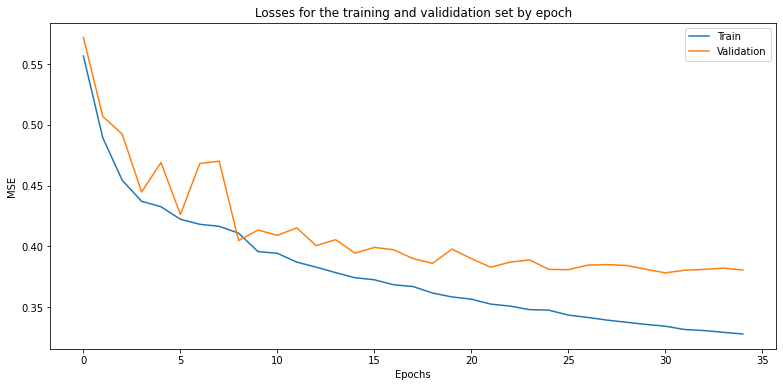

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(13,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Losses for the training and valididation set by epoch")
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

Es la gráfica anterior se observa que los valores de pérdidas del set de entrenamiento y validación iban disminuyendo consecuentemente con el número de iteraciones. 

Alrededor de la iteración 2 se evidencia un pico que puede deberse a los efectos de la regularización Dropout, en donde pudieron haberse desactivado neuronas importantes. Sin embargo, en las siguientes iteraciones se mantiene la estabilización sin existir una diferencia importante entre los sets de entrenamiento y validación que indique un sobreajuste del modelo. 

Por último veamos algunos ejemplos de las predicciones que realiza el modelo y guardemos sus parámetros para ser utilizado posteriormente sin necesitad de repetir el entrenamiento.

In [54]:
real=pd.DataFrame(y_train)
predict=model.predict(pd.DataFrame(x_train_scaled))
desregularization = scaler2.inverse_transform(predict)
pred_escal =pd.DataFrame(desregularization)
for i in range(0,5):
	print("Real=%s, Prediction=%s" % (real[0][i], pred_escal[0][i]))

Real=18650, Prediction=15456.885
Real=9950, Prediction=9976.389
Real=2000, Prediction=2306.7466
Real=7999, Prediction=6970.6274
Real=23999, Prediction=23199.463


In [56]:
# guardar el modelo
model.save('./model/PrediccionPrecios.h5')